# 🎨 Canvas Upcycling AI

[프로젝트] AI기반 캔버스 업사이클링 플랫폼, 디프런씨  
[작성자] Juan Yeo  
  
> 이 파이썬 노트북은 AI기반 캔버스 업사이클링 프로젝트의 개인화 추천 알고리즘의 기술적 가능성을 검토하기 위해 작성되었습니다.  
  
VGG-16 모델로 캔버스 이미지의 특성(패턴)을 분석합니다. 사용자가 촬영한 작품 사진도 패턴을 추출한 뒤, 두 결과값의 유클리드 거리를 계산하여 데이터프레임으로 만듭니다. 이후에는 3차원 시각화, 이미지 출력 등을 통해 결과를 확인합니다.


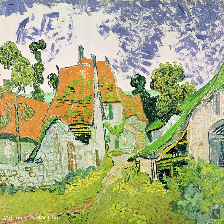

In [27]:
# 이미지 분석에 사용할 캔버스 작품 이미지 목록
canvas_images = [
    'canvas_images/A0001.png',
    'canvas_images/A0201.png',
    'canvas_images/A0203.png',
    'canvas_images/A0205.png',
    'canvas_images/A1001.png',
    'canvas_images/A1002.png',
    'canvas_images/A1003.png',
    'canvas_images/A1004.png',
    'canvas_images/A1005.png',
    'canvas_images/A1006.png',
    'canvas_images/A1007.png',
    'canvas_images/A1008.png',
    'canvas_images/A1009.png',
    'canvas_images/A1010.png',
    'canvas_images/A1011.png',
    'canvas_images/A1012.png',
    'canvas_images/A1013.png',
    'canvas_images/A1014.png',
    'canvas_images/A1015.png',
    'canvas_images/A1016.png'
]

from IPython.display import display
from keras.preprocessing.image import load_img

# 이미지 샘플 확인
sample_image = load_img('/content/drive/MyDrive/Upcycling/' + canvas_images[3], target_size=(224,224))
display(sample_image)

In [3]:
from keras.applications.vgg16 import VGG16

# 사전 학습된 VGG16 모델 가중치 불러오기
# model = vgg16.VGG16()
model = VGG16(weights='imagenet', include_top = True)

# 모델 구조 확인
model.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [13]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import decode_predictions
import numpy as np

def predict_vgg16(model, image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    
    image = image.reshape((1, 224, 224, 3))
    #image = VGG16.preprocess_input(image)
    
    pattern = model.predict(image)
    
    # 모델 결과를 파싱
    pattern = decode_predictions(pattern)

    print(pattern)

In [14]:
predict_vgg16(model, '/content/drive/MyDrive/Upcycling/canvas_images/A0201.png')

49152/35363 [=========================================] - 0s 0us/step
[[('n03291819', 'envelope', 0.25966704), ('n02971356', 'carton', 0.13835536), ('n07248320', 'book_jacket', 0.13085824), ('n04209239', 'shower_curtain', 0.10413674), ('n02840245', 'binder', 0.07792538)]]


In [15]:
predict_vgg16(model, '/content/drive/MyDrive/Upcycling/canvas_images/museum_like_r.jpeg')

[[('n09468604', 'valley', 0.34408444), ('n03042490', 'cliff_dwelling', 0.20926817), ('n09246464', 'cliff', 0.1301572), ('n02134084', 'ice_bear', 0.063013606), ('n02077923', 'sea_lion', 0.04497066)]]


In [17]:
def predict_vgg16_without_decoding(model, image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    
    image = image.reshape((1, 224, 224, 3))
    #image = VGG16.preprocess_input(image)
    
    pattern = model.predict(image)
    
    # 모델 결과를 파싱
    #pattern = decode_predictions(pattern)

    return np.array(pattern[0])

In [19]:
pattern_list = []

for canvas in canvas_images:
  # vgg16 모델로 그림 이미지 패턴 값 계산
  predicted_pattern = predict_vgg16_without_decoding(model, '/content/drive/MyDrive/Upcycling/' + canvas)

  # 계산된 결과를 리스트에 추가
  pattern_list.append(predicted_pattern)

print(pattern_list[0:2])

[array([4.42057591e-08, 4.05376795e-06, 2.99450363e-07, 2.07045628e-06,
       1.78820460e-06, 6.85310488e-06, 1.83348220e-05, 1.19966415e-07,
       1.11660398e-07, 6.17489988e-08, 9.28790939e-07, 1.99925836e-07,
       4.66420806e-06, 5.06769538e-07, 6.29154907e-04, 1.33778303e-06,
       3.48358412e-07, 2.40221452e-05, 4.81627126e-07, 1.44952164e-05,
       1.01656518e-07, 1.09678474e-07, 2.03874162e-08, 7.55708669e-08,
       1.97071373e-07, 1.01643423e-07, 4.18659283e-07, 1.08867923e-07,
       1.45966752e-07, 4.65655177e-07, 3.69285488e-07, 1.22681001e-06,
       1.03471875e-05, 1.38175492e-05, 1.19154993e-06, 1.86578541e-06,
       2.70563633e-05, 1.71402303e-06, 3.80119604e-06, 1.65095003e-07,
       7.92246681e-07, 3.40350027e-07, 1.65942666e-07, 3.85101339e-06,
       1.00102234e-07, 4.54367097e-07, 1.99890550e-07, 4.54006977e-06,
       3.95868796e-08, 2.37588793e-07, 8.85035547e-07, 1.11536001e-05,
       1.21051255e-06, 1.39833264e-06, 1.03829962e-06, 1.06292214e-06,
     

In [22]:
result_pattern = predict_vgg16_without_decoding(model, '/content/drive/MyDrive/Upcycling/canvas_images/museum_like_r.jpeg')

distance_list = []

for pattern in pattern_list:
  # 사용자 데이터와 갠버스 이미지의 특징 벡터를 vgg16 모델로 추출하여
  # 결과값의 유클리드 거리를 계산 (dimension: 1000D)
  p_distance = np.linalg.norm(result_pattern - pattern)

  # 계산된 결과를 리스트에 추가
  distance_list.append(p_distance)

print(distance_list)

[0.54061043, 0.560937, 0.47344527, 0.8757273, 0.6334531, 0.4874165, 0.58802795, 0.6415403, 0.67067915, 0.47222805, 0.60095274, 0.47555044, 0.6142912, 0.7204166, 0.48765993, 0.5693108, 0.63573265, 0.4540548, 0.79748476, 0.6388832]


In [38]:
import pandas as pd

label_list = ['canvas_A0001','canvas_A0201','canvas_A0203','canvas_A0205',
              'canvas_A1001','canvas_A1002','canvas_A1003','canvas_A1004',
              'canvas_A1005','canvas_A1006','canvas_A1007','canvas_A1008',
              'canvas_A1009','canvas_A1010','canvas_A1011','canvas_A1012',
              'canvas_A1013','canvas_A1014','canvas_A1015','canvas_A1016']

df = pd.DataFrame(data={'name': label_list, 'distance': distance_list})
df.head()

,name,distance
0,canvas_A0001,0.540610
1,canvas_A0201,0.560937
2,canvas_A0203,0.473445
3,canvas_A0205,0.875727
4,canvas_A1001,0.633453


In [39]:
# 그래프 표현 위해 300개 패턴을 추출하여 새로운 distance list 만듬
distance_list_100 = []
distance_list_500 = []

for pattern in pattern_list:
  # 사용자 데이터와 갠버스 이미지의 특징 벡터를 vgg16 모델로 추출하여
  # 결과값의 유클리드 거리를 계산 (dimension: 1000D -> 100D, 500D)
  p_distance_100 = np.linalg.norm(result_pattern[200:300] - pattern[200:300])
  p_distance_500 = np.linalg.norm(result_pattern[400:900] - pattern[400:900])

  # 계산된 결과를 리스트에 추가
  distance_list_100.append(p_distance_100)
  distance_list_500.append(p_distance_500)

df['distance_100'] = distance_list_100
df['distance_500'] = distance_list_500

df.sample(1)

,name,distance,distance_100,distance_500
16,canvas_A1013,0.635733,0.066935,0.204035


In [40]:
from sklearn import preprocessing

# 데이터 정규화
df.drop('name', axis=1, inplace=True)
df_scaled = preprocessing.scale(df)

# DataFrame 객체로 변환, name 컬럼 추가
df = pd.DataFrame(df_scaled, columns = df.columns)
df['name'] = label_list

df.sample(1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


,distance,distance_100,distance_500,name
6,-0.08105,0.554679,-0.378648,canvas_A1003


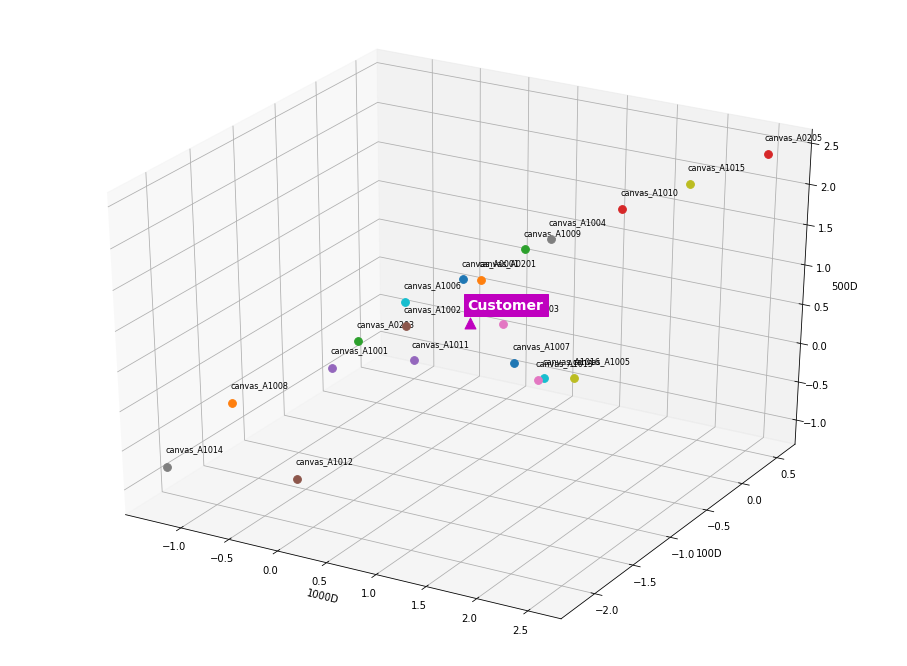

In [75]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

for index in range(0, 20):
    # 각 거리 데이터 대입
    x = df.loc[index,'distance']
    y = df.loc[index,'distance_100']
    z = df.loc[index,'distance_500']

    # 3차원 분산도 그림
    ax.scatter(x, y, z, marker='o', s=60)
    ax.text(x-0.1, y+0.1, z+0.1, label_list[index], fontsize=8)

ax.scatter(0, 0, 0, marker='^', color='m', s=120)
ax.text(-0.1, 0.1, 0.1, 'Customer', fontsize=14, fontweight='extra bold', color='w', backgroundcolor='m')
ax.set_xlabel('1000D')
ax.set_ylabel('100D')
ax.set_zlabel('500D')

plt.show()

In [79]:
# 표준화 과정을 거치지 않은 df 다시 생성
df = pd.DataFrame(data={'name': label_list, 'distance': distance_list, 'distance_100': distance_list_100, 'distance_500': distance_list_500})

# 거리 순으로 정렬하여 표시
df.sort_values(by=['distance'], axis=0, ascending=True)

,name,distance,distance_100,distance_500
17,canvas_A1014,0.454055,0.063518,0.237415
9,canvas_A1006,0.472228,0.067037,0.307587
2,canvas_A0203,0.473445,0.066245,0.285876
11,canvas_A1008,0.475550,0.064239,0.324065
5,canvas_A1002,0.487417,0.066830,0.275725
14,canvas_A1011,0.487660,0.066958,0.183955
0,canvas_A0001,0.540610,0.067041,0.386923
1,canvas_A0201,0.560937,0.067047,0.394025
15,canvas_A1012,0.569311,0.063951,0.222456
6,canvas_A1003,0.588028,0.067038,0.303750


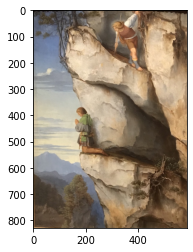

In [82]:
# 사용자 이미지 확인 (예: 소비자가 업로드한 전시 사진)
customer_image = load_img('/content/drive/MyDrive/Upcycling/canvas_images/museum_like_r.jpeg')
plt.imshow(customer_image)

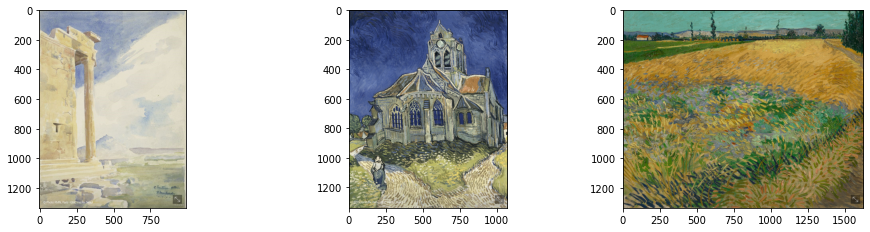

In [86]:
# VGG-16 모델로 추출한 패턴 거리가 가까운 그림 확인
close_3 = ['canvas_A1014', 'canvas_A1006', 'canvas_A0203']

fig = plt.figure(figsize=(16, 8))
rows = 2
columns = 3
for i in range(0, 3):
  canvas_image = load_img('/content/drive/MyDrive/Upcycling/canvas_images/' + close_5[i][7:] + '.png')
  
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(canvas_image)